# Exploratory Data Analysis

Подгружаем пакеты

In [0]:
import numpy as np
import pandas as pd
import seaborn as sns
import wordcloud as wc
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import os
#import matplotlib.colors as mpl_colors

In [0]:
from google.colab import drive
drive.mount('/content/drive/')

In [0]:
PATH_TO_DATA = '/content/drive/My Drive/MusicRecommenderDSMinor/'

## Исполнители
Датасет со списком исполнителей и их встречаемостью:

In [25]:
%%time
art_aggr = pd.read_csv(os.path.join(PATH_TO_DATA, 'data/artists_agg.csv'), error_bad_lines=False, header=None, names=['artist','count']) 

CPU times: user 8.93 s, sys: 617 ms, total: 9.55 s
Wall time: 10 s


In [26]:
art_aggr.shape

(5575698, 2)

In [38]:
art_aggr.iloc[1900:1905]

,artist,count
1900,Fred Astaire & Judy Garland,1.0
1901,Gaullin Remix,1.0
1902,Gusttavo Lima,2.0
1903,HSHpro & Amsterdam aka Mikro,1.0
1904,Hasenchat Musik,1.0


In [82]:
art_aggr.query('artist == "Ariana Grande"')

,artist,count
701876,Ariana Grande,7209.0


**Из выводов**: много песен с неизвестным исполнителем, кто-то повторяется *(опечатки и разные варианты написания)* и посчитался немного не так, но пойдет, мы то рекомендуем хорошее (главное чтобы не garbage in, you know). Подправим попозже.

In [45]:
art_aggr.sort_values(by=['count'], ascending=False).head(10)

,artist,count
1899237,Little Big,633718.0
4382602,Неизвестен,385805.0
3621608,Баста,369593.0
3936188,Егор Крид,283401.0
4238361,Макс Корж,279055.0
4087534,Каспийский Груз,271838.0
1326724,EA7,251003.0
4940484,Элджей,211184.0
4307770,Мот,194981.0
4177862,Ленинград,180635.0


### Самые популярные исполнители

In [0]:
def barplot_art(df, topn, path_to_save):
  sns.set( rc={'figure.figsize': (14, 7)}) # style='whitegrid', context='talk',
  # оставляем только топ
  df_top = df.sort_values(by=['count'], ascending=False).head(topn)
  
  # графичек
  ax = sns.barplot(x='count', y='artist', data=df_top
                   #, hue='name'
                   , palette=sns.cubehelix_palette(topn, reverse=True))
  ax.set(xlabel='сколько раз встречается',
         ylabel='исполнитель')
  
  fig = plt.gcf()
  plt.tight_layout()
  
  # сохраняем
  fig.savefig(os.path.join(path_to_save, barplot_art.__name__  + '.png'), dpi=1200)
  plt.show()
  plt.close('all')

Делаем график по 15 исполнителям:

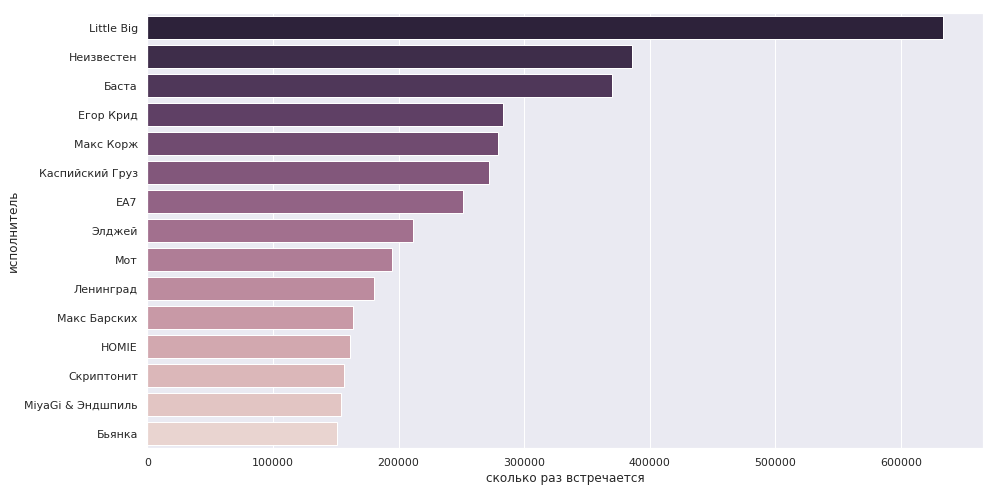

In [76]:
barplot_art(art_aggr, 15, PATH_TO_DATA)

## Длина плейлиста

In [0]:
users_count = pd.read_csv(os.path.join(PATH_TO_DATA, 'data/users_count.csv'), error_bad_lines=False, header=None, names=['ind', 'user', 'cnt'], index_col=0)

In [57]:
users_count.head()

,user,cnt
ind,,
0,160,5055
1,301,4234
2,70,3984
3,255,3883
4,271,2631


Note: из-за того, что датасет обрабатывался по чанкам, плейлисты юзеров могли посчитаться по частям.

In [58]:
users_count.shape

(969677, 2)

In [59]:
users_count.user.nunique()  # число юзеров

968772

Но можно починить :))

In [60]:
users_count.groupby('user')['cnt'].agg('sum').sort_values(ascending=False).head()

user
949095    15492
905057    15249
910408    15009
916744    14925
460240    14022
Name: cnt, dtype: int64

- В среднем - 94 песни
- Но медиана полезнее - 17
- Самый большой - 15 492

In [84]:
users_count.groupby('user')['cnt'].agg('sum').describe()

count    968772.000000
mean         94.951992
std         288.149779
min           1.000000
25%           4.000000
50%          17.000000
75%          69.000000
max       15492.000000
Name: cnt, dtype: float64

In [85]:
users_count.groupby('user')['cnt'].agg('sum').median()

17.0

И график

In [0]:
def dist_users(users_count, path_to_save):
  sns.set( rc={'figure.figsize': (14, 7)}) # style='whitegrid', context='talk',
  # df
  df = pd.DataFrame(users_count.groupby('user')['cnt'].agg('sum'))
  
  # графичек
  max_value = df.cnt.max()
  ax = sns.distplot(df.cnt.value_counts(), bins=list(range(0, max_value, 50)),
                    color='#4680c2', kde=False)
  # ось х чтобы было видно, иначе все сбиваются в уголок
  ax.set(xlabel='num of songs', ylabel='users')
  ax.margins(x=0)
  fig = plt.gcf()
  plt.xlim(0,2000)
  plt.tight_layout()
  
  # сохраняем
  fig.savefig(os.path.join(path_to_save, dist_users.__name__ + '.png'), dpi=1200)
  plt.show()
  plt.close('all')

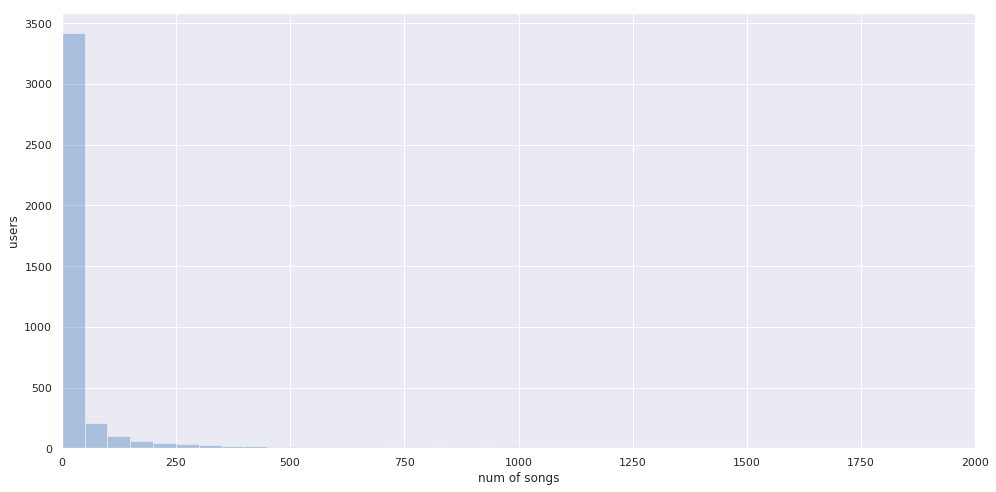

In [88]:
dist_users(users_count, PATH_TO_DATA)